# Table of Contents

#### 01 Importing Libraries and Data

#### 02 Visualizations
A. Correlation Matrix Heatmap
<br>B. Scatterplot
<br>C. Pairplot
<br>D. Categorical Plot



#### 03 Questions/Findings

#### 04 Hypotheses

#### 05 Export the Data

# 01 Importing Libraries and Data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.2


In [4]:
path = r'/Users/Dena/Murder Data Analysis'

In [5]:
# import the clean UCR data
df_ucr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ucr_clean.pkl'))

In [6]:
# check the output
df_ucr.head()

,ORI,name,year,murders,cleared,state,county,agency,cold_cases,region
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage,1,West
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage,2,West
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage,0,West
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage,2,West
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage,3,West


In [7]:
# import the clean SHR data
df_shr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'shr_clean.pkl'))

In [8]:
# check the output
df_shr.head()

,ID,county,ORI,state,agency,agent_type,source,solved,year,month,...,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,file_date,MSA,region
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,nan,0,0,30180.0,"Anchorage, AK",West
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,...,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West


# 02 Visualizations

#### A. Correlation Matrix Heatmap

In [9]:
# find the correlation matrix for the UCR date frame
df_ucr.corr

<bound method DataFrame.corr of             ORI               name  year  murders  cleared    state  \
0       AK00101          ANCHORAGE  1965        7        6   Alaska   
1       AK00101          ANCHORAGE  1966       18       16   Alaska   
2       AK00101          ANCHORAGE  1967        1        1   Alaska   
3       AK00101          ANCHORAGE  1968        7        5   Alaska   
4       AK00101          ANCHORAGE  1969        7        4   Alaska   
...         ...                ...   ...      ...      ...      ...   
166220  WYDI050  WIND RIVER AGENCY  2014        3        3  Wyoming   
166221  WYDI050  WIND RIVER AGENCY  2015        1        1  Wyoming   
166222  WYDI050  WIND RIVER AGENCY  2017        2        2  Wyoming   
166223  WYDI050  WIND RIVER AGENCY  2018        1        0  Wyoming   
166224  WYDI050  WIND RIVER AGENCY  2019        1        1  Wyoming   

               county             agency  cold_cases region  
0       Anchorage, AK          Anchorage           1 

This is too much unnecessary information.

In [10]:
# create a new UCR data frame with the quantitative columns only
df_ucr_quant = df_ucr.drop(['ORI','name', 'year', 'state', 'county', 'agency', 'region'], axis=1)

# check the output
df_ucr_quant.head()

,murders,cleared,cold_cases
0,7,6,1
1,18,16,2
2,1,1,0
3,7,5,2
4,7,4,3


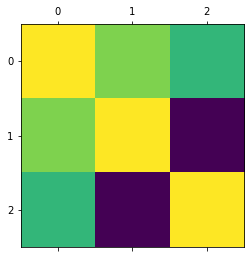

In [11]:
# create a heatmap based on this correlation matrix
plt.matshow(df_ucr_quant.corr())
plt.show()

Text(0.5, 1.0, 'UCR Heatmap')

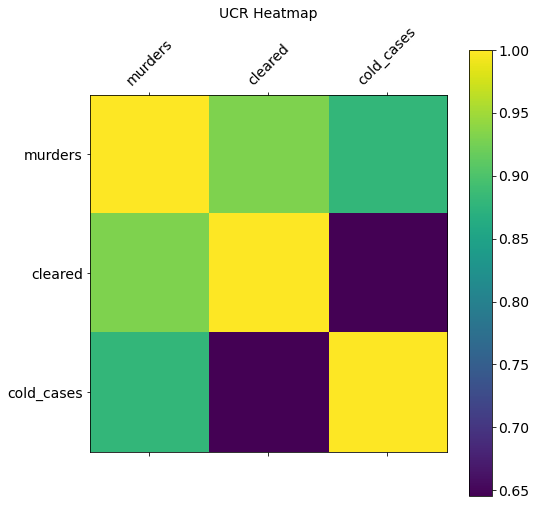

In [12]:
# format the heatmap

ucr_heatmap_1 = plt.figure(figsize=(8, 8)) # size 
plt.matshow(df_ucr_quant.corr(), fignum=ucr_heatmap_1.number) # type
plt.xticks(range(df_ucr_quant.shape[1]), df_ucr_quant.columns, fontsize=14, rotation=45) # x-axis labels
plt.yticks(range(df_ucr_quant.shape[1]), df_ucr_quant.columns, fontsize=14) # y-axis labels
cb = plt.colorbar() # legend for the colors
cb.ax.tick_params(labelsize=14) # font size
plt.title('UCR Heatmap', fontsize=14) # title


There is a strong correlation between all these variables. This makes sense because the number of cleared homicides is a subset of the total number of murders, and the number of cold cases is the difference between the number of murders and the number cleared. They are all related.

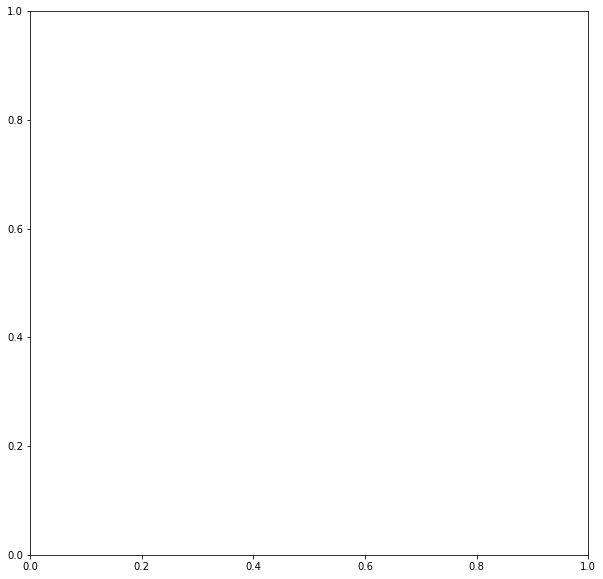

In [13]:
# create the same heatmap in seaborn
# begin with a subplot

ucr_heatmap_2,ax = plt.subplots(figsize=(10,10))


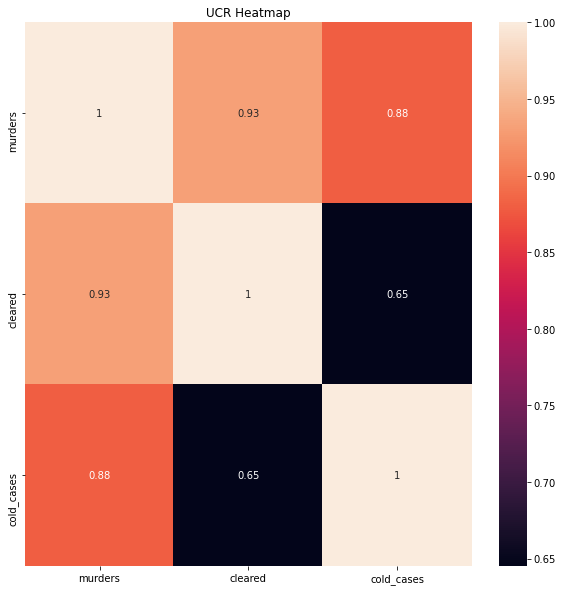

In [14]:
# create the heatmap
ucr_heatmap_2 = sns.heatmap(df_ucr_quant.corr(), annot = True, ax = ax) 
ucr_heatmap_2.set_title('UCR Heatmap')
ucr_heatmap_2.figure

In [15]:
# print the SHR columns
df_shr.columns

Index(['ID', 'county', 'ORI', 'state', 'agency', 'agent_type', 'source',
       'solved', 'year', 'month', 'incident', 'action_type', 'homicide',
       'situation', 'victim_age', 'victim_sex', 'victim_race',
       'victim_ethnicity', 'offender_age', 'offender_sex', 'offender_race',
       'offender_ethnicity', 'weapon', 'relationship', 'circumstance',
       'subcircumstance', 'additional_victims', 'additional_offenders',
       'file_date', 'MSA', 'region'],
      dtype='object')

In [16]:
# create a new SHR data frame with the quantitative columns only
df_shr_quant = df_shr.drop(['ID', 'county', 'ORI', 'state', 'agency', 'agent_type', 'source',
       'solved', 'year', 'month', 'incident', 'action_type', 'homicide',
       'situation', 'victim_sex', 'victim_race',
       'victim_ethnicity', 'offender_sex', 'offender_race',
       'offender_ethnicity', 'weapon', 'relationship', 'circumstance', 'file_date',
       'subcircumstance', 'MSA', 'region'], axis=1)

# check the output
df_shr_quant.head()

,victim_age,offender_age,additional_victims,additional_offenders
0,48.0,68.0,0,0
1,33.0,44.0,0,0
2,38.0,27.0,0,0
3,41.0,34.0,0,0
4,33.0,37.0,0,0


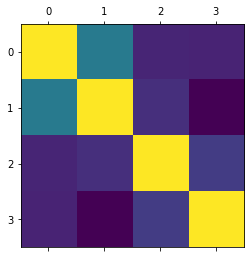

In [17]:
# create a heatmap based on this correlation matrix
plt.matshow(df_shr_quant.corr())
plt.show()

Text(0.5, 1.0, 'SHR Heatmap')

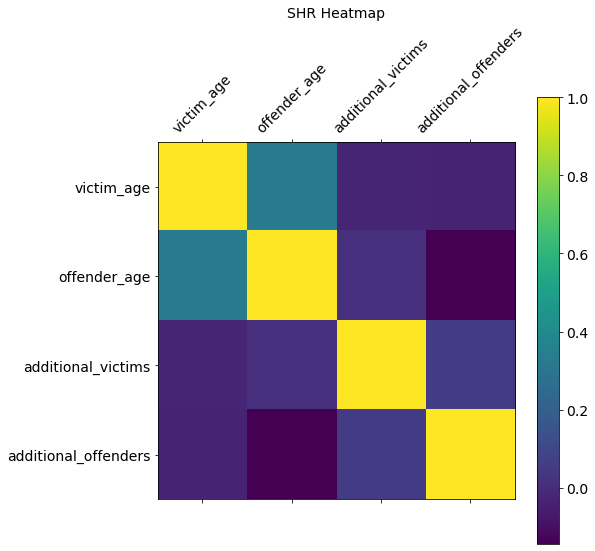

In [18]:
# format the heatmap

shr_heatmap_1 = plt.figure(figsize=(8, 8)) # size 
plt.matshow(df_shr_quant.corr(), fignum=shr_heatmap_1.number) # type
plt.xticks(range(df_shr_quant.shape[1]), df_shr_quant.columns, fontsize=14, rotation=45) # x-axis labels
plt.yticks(range(df_shr_quant.shape[1]), df_shr_quant.columns, fontsize=14) # y-axis labels
cb = plt.colorbar() # legend for the colors
cb.ax.tick_params(labelsize=14) # font size
plt.title('SHR Heatmap', fontsize=14) # title

There is a weak to moderate correlation between the victim and offender ages, and almost no correlation anywhere else.

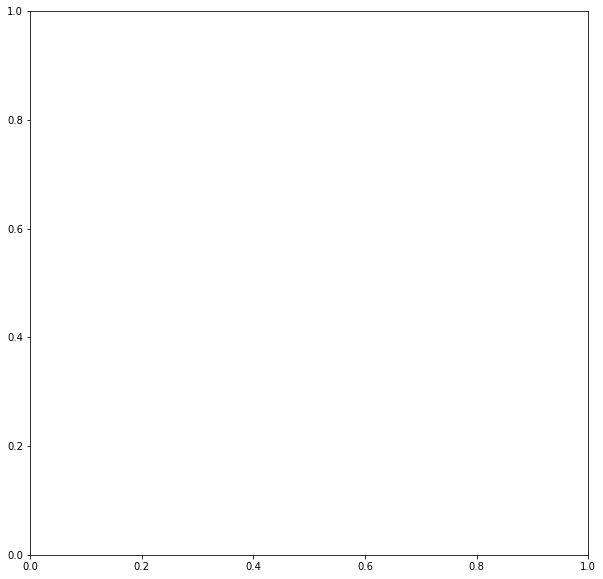

In [19]:
# create the same heatmap in seaborn
# begin with a subplot

shr_heatmap_2,ax = plt.subplots(figsize=(10,10))

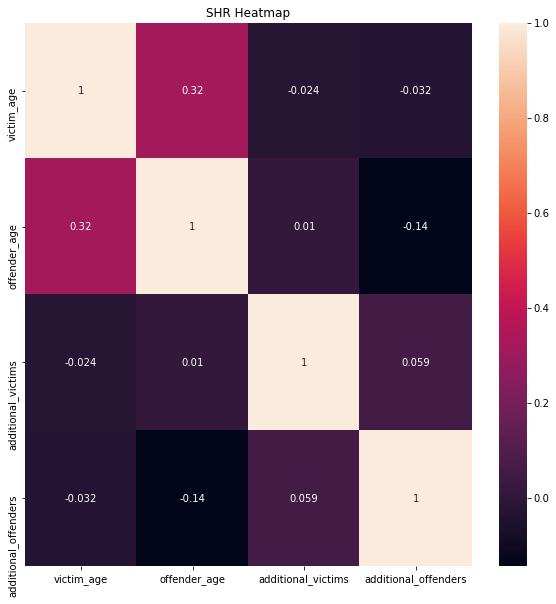

In [20]:
# create the heatmap
shr_heatmap_2 = sns.heatmap(df_shr_quant.corr(), annot = True, ax = ax) 
shr_heatmap_2.set_title('SHR Heatmap')
shr_heatmap_2.figure

#### B. Scatterplot

Text(0.5, 1.0, 'Number of Murders vs Cleared Murders')

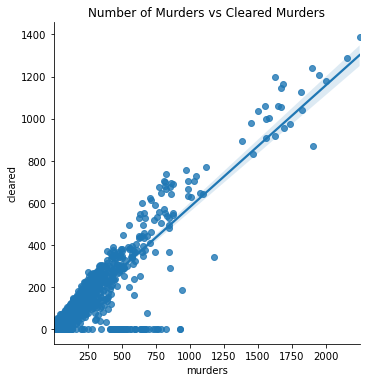

In [21]:
# Create a scatterplot for the "murders" and "cleared" columns

scatter_1 = sns.lmplot(x = 'murders', y = 'cleared', data = df_ucr_quant)
plt.title('Number of Murders vs Cleared Murders')

The linear relationship is more evident as the number of murders and cleared murders increases. However, towards the bottom of the plot, we can see a handful of instances with a high amount of murders and none or few cleared.

Text(0.5, 1.0, 'Number of Murders vs Cold Cases')

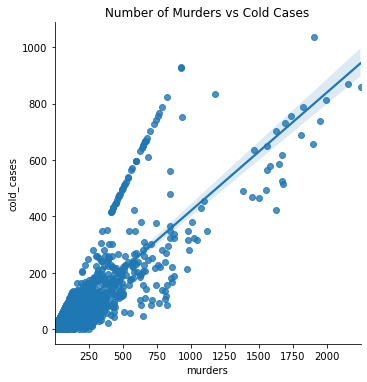

In [22]:
# Create a scatterplot for the "murders" and "cold_cases" columns

scatter_2 = sns.lmplot(x = 'murders', y = 'cold_cases', data = df_ucr_quant)
plt.title('Number of Murders vs Cold Cases')

There appears to be two separate branches of linear relationships-- Instances where most murders go unsolved, and then another branch where a smaller proportion of murders end up as cold cases.

Text(0.5, 1.0, 'Number of Homicides Cleared vs Cold Cases')

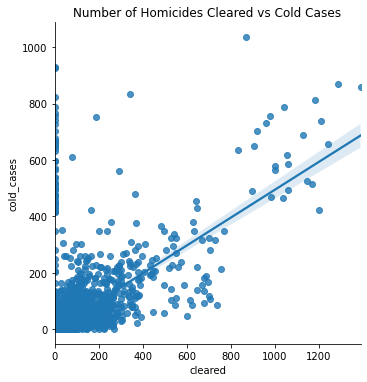

In [23]:
# Create a scatterplot for the "cleared" and "cold_cases" columns

scatter_3 = sns.lmplot(x = 'cleared', y = 'cold_cases', data = df_ucr_quant)
plt.title('Number of Homicides Cleared vs Cold Cases')

This plot is similar to the previous one. There is a near vertical line at 0 on the x-axis for all the times there were no murders cleared, and then a loose linear relationship between cold cases and cleared homicides as the number of cleared homicides increases. 

Text(0.5, 1.0, 'Offender Age vs Victim Age')

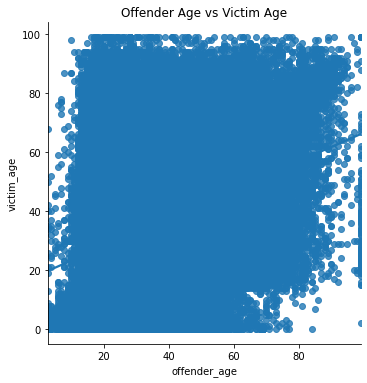

In [24]:
# Create a scatterplot for the "victim_age" and "offender_age" columns

scatter_4 = sns.lmplot(x = 'offender_age', y = 'victim_age', data = df_shr_quant)
plt.title('Offender Age vs Victim Age')

From this scatter plot, the correlation appears to be very weak, with points all over the grid and no discernable pattern.

#### C. Pairplot


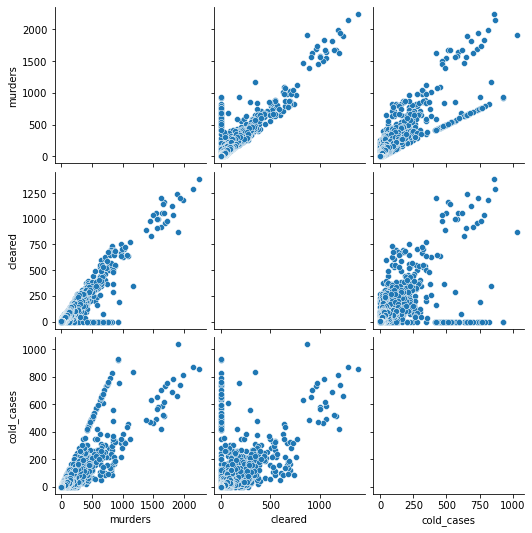

In [25]:
# create a pair plot for the UCR data

ucr_pair = sns.pairplot(df_ucr_quant)

I have actually explored these scatterplots in the previous section. I do not know why nothing is showing up for the histograms. There is nothing new to glean from these plots. I will plot the histograms separately below.

Text(0.5, 1.0, 'Frequency of Murders')

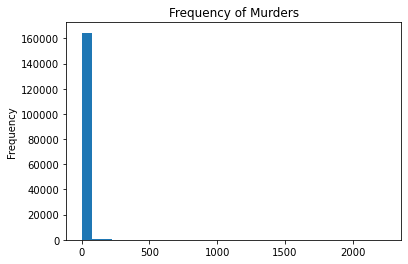

In [26]:
hist_1 = df_ucr_quant['murders'].plot.hist(bins = 30)
plt.title('Frequency of Murders')

Text(0.5, 1.0, 'Frequency of Cold Cases')

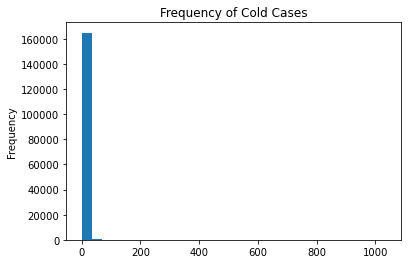

In [27]:
hist_2 = df_ucr_quant['cold_cases'].plot.hist(bins = 30)
plt.title('Frequency of Cold Cases')

Text(0.5, 1.0, 'Frequency of Cleared Homicides')

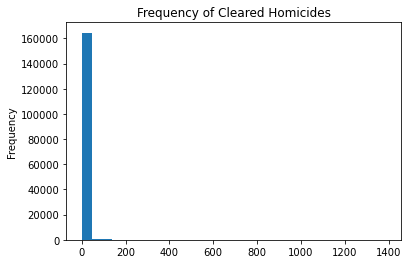

In [28]:
hist_3 = df_ucr_quant['cleared'].plot.hist(bins = 30)
plt.title('Frequency of Cleared Homicides')

These all show that most of the instances have low numbers, at or near 0.

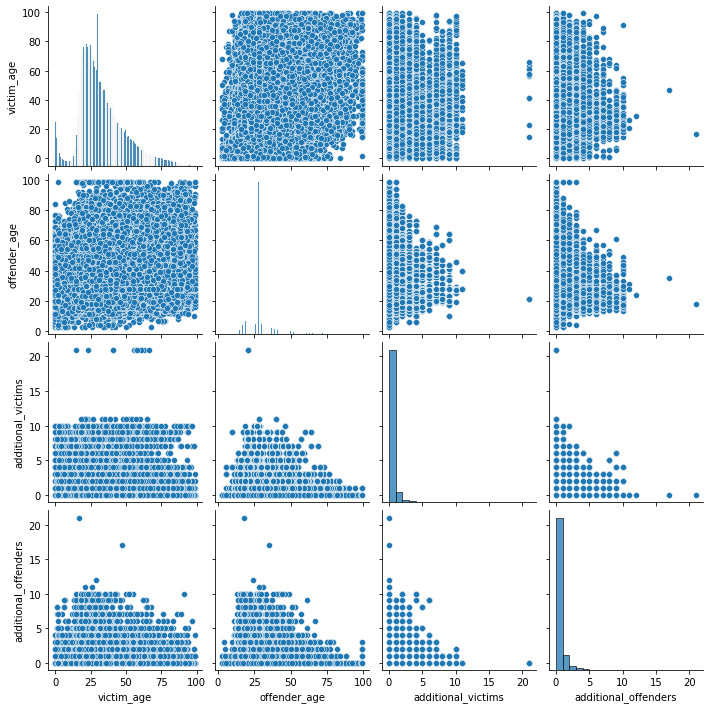

In [29]:
# create a pair plot for the SHR data

pairplot_2 = sns.pairplot(df_shr_quant)

These plots all show weak correlations. The age histograms clearly display the imputed data as an unusually tall column. The additional victims/offenders histograms are both skewed left with most instances having 0 additional offenders/victims.
<br><br>
I would like to take a closer look at the victim age histogram. There is a certain age where the number of victims rapidly increases. The victim age then decreases after. 
<br><br>
Ignoring the imputation, the offender age appears to be skewed left, with most ages leaning towards younger, centered around 25.

Text(0.5, 1.0, 'Frequency of Victim Ages')

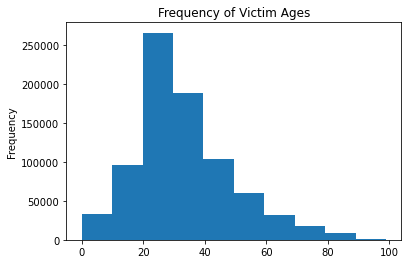

In [30]:
# a closer look at victim ages
hist_4 = df_shr_quant['victim_age'].plot.hist(bins = 10)
plt.title('Frequency of Victim Ages')

Most victims are between 20 and 30 years old.

Text(0.5, 1.0, 'Frequency of Victim Ages')

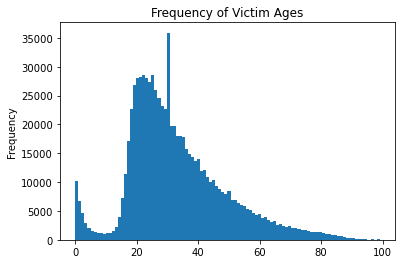

In [31]:
# a closer look at victim ages
hist_5 = df_shr_quant['victim_age'].plot.hist(bins = 100)
plt.title('Frequency of Victim Ages')

The histogram shows significant increases in the number of victims each age from around 16 to 20 years old.

#### D. Categorical Plot

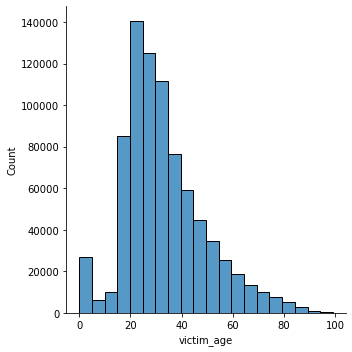

In [32]:
# create a categorical variable that splits the 'victim_age' column into categories
hist_6 = sns.displot(df_shr_quant['victim_age'], bins = 20)

In [33]:
# create 4 categories: Minor, Young adult, Middle age, and Senior
df_shr.loc[df_shr['victim_age'] < 18, 'victim_age_category'] = 'Minor'

In [34]:
df_shr.loc[(df_shr['victim_age'] >= 18) & (df_shr['victim_age'] <= 35), 'victim_age_category'] = 'Young Adult'

In [35]:
df_shr.loc[(df_shr['victim_age'] > 35) & (df_shr['victim_age'] <= 55), 'victim_age_category'] = 'Middle Age'

In [36]:
df_shr.loc[df_shr['victim_age'] > 55, 'victim_age_category'] = 'Senior'

In [37]:
# check the output
df_shr['victim_age_category'].value_counts(dropna = 0)

Young Adult    444566
Middle Age     202942
Senior          78627
Minor           78600
Name: victim_age_category, dtype: int64

In [38]:
df_shr.head()

,ID,county,ORI,state,agency,agent_type,source,solved,year,month,...,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,file_date,MSA,region,victim_age_category
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,...,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,...,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Young Adult
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,...,"Handgun - pistol, revolver, etc",Stranger,Other,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,...,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,...,Knife or cutting instrument,Brother,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Young Adult


In [39]:
df_shr.columns

Index(['ID', 'county', 'ORI', 'state', 'agency', 'agent_type', 'source',
       'solved', 'year', 'month', 'incident', 'action_type', 'homicide',
       'situation', 'victim_age', 'victim_sex', 'victim_race',
       'victim_ethnicity', 'offender_age', 'offender_sex', 'offender_race',
       'offender_ethnicity', 'weapon', 'relationship', 'circumstance',
       'subcircumstance', 'additional_victims', 'additional_offenders',
       'file_date', 'MSA', 'region', 'victim_age_category'],
      dtype='object')

Text(0.5, 1.0, 'Victim Gender vs Relationship to Offender by Victim Age ')

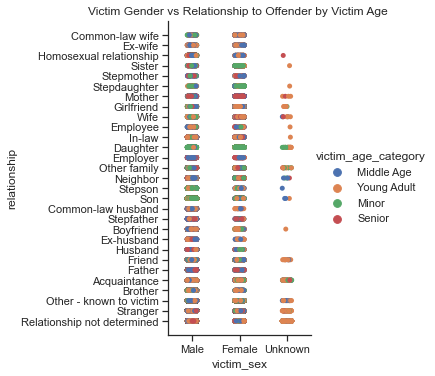

In [40]:
# Create a categorical plot for the victim age categories

sns.set(style="ticks")
catplt_vic = sns.catplot(x = 'victim_sex', y = 'relationship', hue = 'victim_age_category', data = df_shr)
plt.title('Victim Gender vs Relationship to Offender by Victim Age ')

These plot points are very crowded together and hard to see. I can't figure out how to make them more spread apart.
<br><br>
If the proportion of coloring is accurate, then daughters/stepdaughters, sisters, and sons/stepsons are typically murdered as minors.
<br><br>
Wives are more likely to be murdered as young adults. Mothers are more likely to be murdered as seniors.
<br><br>
Young adult victims are most likely to have their gender unidentified and have an unknown relatonship to their murderer.

# 03 Questions/Findings

One question was answered:
<br>
Is there a correlation between the number of victims and the age of the offender?
<br>
No, there is no correlation.
<br><br>
I'd like to investigate further into the circumstances surrounding the murders of sons/daughters, and find the actual percentage of those victims who are minors.

# 04 Hypotheses

Some hypotheses based on the catplot:
<br><br>
Offenders who murder their daughters and sons are more likely to do so when the victims are minors.
<br><br>
Wives are more likely to be murdered by their spouse as young adults.
<br><br>

# 05 Export the Data

In [41]:
# export the updated shr data
df_shr.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'shr_clean_2.pkl'))

In [42]:
# export heatmap 1
ucr_heatmap_1.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_heatmap_1.png'),bbox_inches = 'tight')

In [43]:
# export heatmap 2
ucr_heatmap_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_heatmap_2.png'),bbox_inches = 'tight')

In [44]:
# export heatmap 3
shr_heatmap_1.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_heatmap_1.png'),bbox_inches = 'tight')

In [45]:
# export heatmap 4
shr_heatmap_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_heatmap_2.png'),bbox_inches = 'tight')

In [46]:
# export scatter plot 1
scatter_1.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_murd_clrd.png'),bbox_inches = 'tight')

In [47]:
# export scatter plot 2
scatter_2.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_murd_cold.png'),bbox_inches = 'tight')

In [48]:
# export scatter plot 3
scatter_3.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_clrd_cold.png'),bbox_inches = 'tight')

In [49]:
# export scatter plot 4
scatter_4.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_ages.png'),bbox_inches = 'tight')

In [50]:
# pairplot 1
ucr_pair.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_pair.png'),bbox_inches = 'tight')

In [51]:
# pairplot 2
pairplot_2.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_pair.png'),bbox_inches = 'tight')

In [52]:
# histogram 1
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_murd.png'),bbox_inches = 'tight')

In [53]:
# histogram 2
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_cold.png'),bbox_inches = 'tight')

In [54]:
# histogram 3
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_clr.png'),bbox_inches = 'tight')

In [55]:
# histogram 4
hist_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_vic_age_1.png'),bbox_inches = 'tight')

In [56]:
# histogram 5
hist_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_vic_age_2.png'),bbox_inches = 'tight')

In [57]:
# histogram 6
hist_6.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_vic_age_3.png'),bbox_inches = 'tight')

In [58]:
# catplot 1
catplt_vic.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_cat_vic.png'),bbox_inches = 'tight')

In [59]:
# export the SHR data frame as a CSV file (having issues with pkl)
df_shr.to_csv(os.path.join(path, '02 Data','Prepared Data', 'shr_clean_2.csv'))